In [1]:
import numpy as np
import wisps
import wisps.simulations as wispsim
import wisps.simulations.effective_numbers as eff
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from tqdm import tqdm 
import pandas as pd
import matplotlib as mpl
%matplotlib inline

In [2]:
from wisps import drop_nan

In [3]:
baraffe_data=eff.simulation_outputs()["baraffe03"]
saumon_data=eff.simulation_outputs()["saumon"]
baraffe=wispsim.simulate_spts(name="baraffe03")
saumon=wispsim.simulate_spts(name="saumon")

In [4]:
import seaborn as sns
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette("cubehelix",  10))

In [5]:
42-15

27

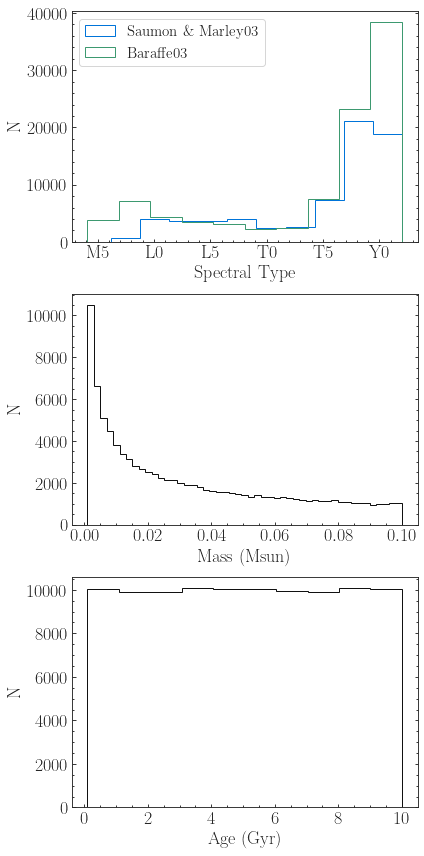

In [6]:
fig, (ax, ax1, ax2)=plt.subplots(figsize=(4*1.5, 8*1.5), nrows=3)

h=ax.hist(saumon['spts'].flatten(), label='Saumon \& Marley03', histtype='step', color='#0074D9')
h=ax.hist(baraffe['spts'].flatten(), label='Baraffe03', histtype='step', color='#3D9970')

h=ax1.hist(saumon['mass'].flatten(), histtype='step', bins='auto', color='#111111')

h=ax2.hist(saumon['ages'].flatten(), histtype='step', color='#111111')

ax.legend(fontsize=15, loc='upper left')
ax.set_xlabel('Spectral Type', fontsize=18)
ax.set_ylabel('N', fontsize=18)
ax.set_xticks([15, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.minorticks_on()

ax1.set_xlabel('Mass (Msun)', fontsize=18)
ax1.set_ylabel('N', fontsize=18)
ax1.minorticks_on()

ax2.set_xlabel('Age (Gyr)', fontsize=18)
ax2.set_ylabel('N', fontsize=18)
ax2.minorticks_on()

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/simulation_dists.pdf', bbox_inches='tight')

In [7]:
cmap= sns.diverging_palette(100, 300, s=80, l=55, n=19, as_cmap=True)

In [8]:
#sns.color_palette("coolwarm", 7, as_cmap=True)

In [9]:
cmap_teff=sns.diverging_palette(100, 300, s=80, l=55, n=19, as_cmap=True)

In [10]:
#fig, (ax, ax1)=plt.subplots(figsize=(12, 4), ncols=2, sharey=True, sharex=True)

#h=ax.scatter(saumon['mass'].flatten(), saumon['ages'].flatten(), c=saumon['teffs'].flatten(), s=1., cmap='hot')
#h=ax1.scatter(baraffe['mass'].flatten(), baraffe['ages'].flatten(), c=baraffe['teffs'].flatten(), s=1., cmap='hot')
#h=ax.hist(baraffe['spts'].flatten(), label='Baraffe03', histtype='step',  color='#3D9970')

#h=ax1.hist(saumon['mass'].flatten(), histtype='step', color='#0074D9')



In [11]:
pnts=wisps.OBSERVED_POINTINGS

In [12]:
volumes=[]
dlimits=[]
for pnt in pnts:
    vs=[]
    dls=[]
    for g in wispsim.SPGRID:
        vsx=[]
        for h in wispsim.HS:
            vsx.append((pnt.volumes[h])[g])
        dls.append(pnt.dist_limits[g])
        vs.append(vsx)
    volumes.append(vs)
    dlimits.append(dls)
volumes=np.array(volumes)
dlimits=np.array(dlimits)

In [13]:
galc=SkyCoord([x.coord.galactic for x in pnts])

In [14]:
vls250=volumes[:,0, :,]

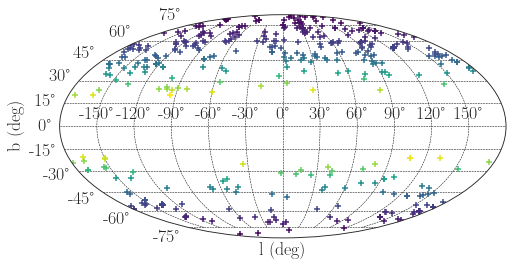

In [15]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection="mollweide")
c=ax.scatter(galc.l.wrap_at(180*u.degree).radian,galc.b.wrap_at(90*u.degree).radian, 
           c=np.log10(vls250[:,0]), marker='+', cmap='viridis')
ax.set_xlabel('l (deg)', fontsize=18)
ax.set_ylabel('b (deg)', fontsize=18)
plt.grid()

In [16]:
from matplotlib.colors import Normalize
import seaborn as sns
cnorm=Normalize(wispsim.HS[0]/100, wispsim.HS[-1]/100)

In [17]:
from scipy import integrate

In [18]:
volume_fx=np.vectorize(wispsim.custom_volume)

7it [00:01,  3.82it/s]


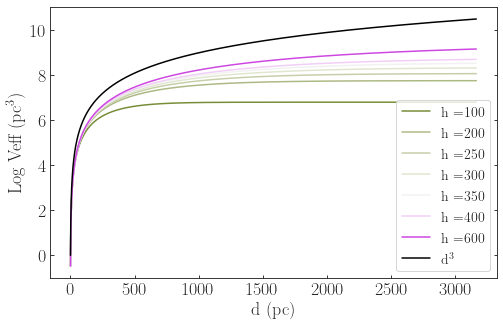

In [19]:
ds=np.logspace(0, 3.5, 1000)
fig, ax=plt.subplots(figsize=(8, 5))
for idx, h in tqdm(enumerate(wispsim.HS)):
    plt.plot(ds, np.log10(volume_fx(0.,np.pi/4, 0, ds,h)), color=cmap(cnorm(h/100)), label=r'h ={}'.format(h))
plt.plot(ds, np.log10(ds**3), c='k', label=r'd$^3$')
plt.ylabel(r'Log Veff (pc$^3$)', fontsize=18)
plt.xlabel('d (pc)', fontsize=18)
plt.legend(fontsize=14)

In [20]:
vsunif=np.nansum((dlimits[:, :,0])**3-(dlimits[:, :,1])**3, axis=0)*4.1*(u.arcmin**2).to(u.radian**2)

In [21]:
VOLUMES=np.nansum(volumes.T, axis=2)*4.1*(u.arcmin**2).to(u.radian**2)

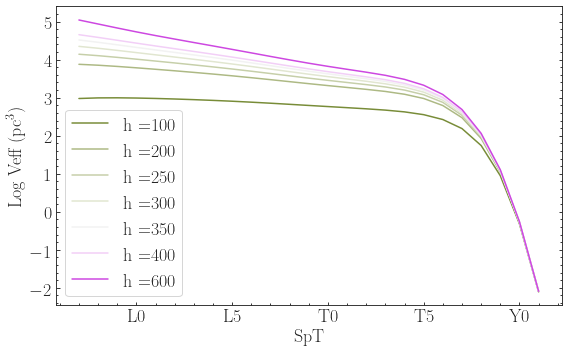

In [22]:
fig, ax=plt.subplots(figsize=(8, 5))
for idx, h in enumerate(wispsim.HS):
    plt.plot(wispsim.SPGRID, np.log10(VOLUMES[idx]), color=cmap(cnorm(h/100)), label=r'h ={}'.format(h))

#plt.plot(wispsim.SPGRID, np.log10(vsunif), label=r'd$^3$' )
plt.ylabel(r'Log Veff (pc$^3$)', fontsize=18)
plt.xlabel('SpT', fontsize=18)
plt.legend(fontsize=18)

plt.minorticks_on()

plt.tight_layout()
ax.set_xticks([20, 25, 30, 35, 40])
ax.set_xticklabels(['L0', 'L5', 'T0', 'T5', 'Y0'])

plt.savefig(wisps.OUTPUT_FIGURES+'/simulation_volumes.pdf', bbox_inches='tight')

In [23]:
bays_distances=eff.BAYESIAN_DISTANCES_VOLUMES

In [24]:
bays_distances.keys()

dict_keys(['distances', 'ls', 'bs'])

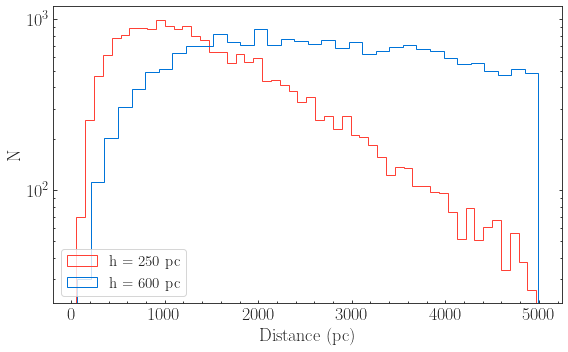

In [25]:
fig, ax=plt.subplots( figsize=(8, 5))
h=ax.hist(bays_distances['distances'][250].flatten(), color='#FF4136',
          bins='auto', histtype='step', label="h = 250 pc")
h=ax.hist(bays_distances['distances'][600].flatten(),  color='#0074D9', bins='auto', 
          histtype='step', label="h = 600 pc")


ax.legend(fontsize=15, loc='lower left')
ax.set_xlabel('Distance (pc)', fontsize=18)
ax.set_ylabel('N', fontsize=18)
ax.set_yscale('log')



ax.minorticks_on()
ax1.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/simulation_distances.pdf', bbox_inches='tight')

In [26]:
maglimits=pd.DataFrame([x.mag_limits for x in pnts])
exposure_times=[np.nanmean(x.exposure_time) for x in pnts]

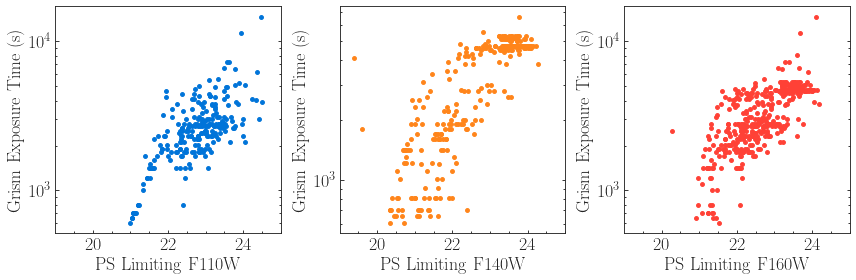

In [27]:
fig, ax=plt.subplots(ncols=3, figsize=(12, 4))
ax[0].scatter(maglimits.F110, exposure_times, c='#0074D9', s=15.)
ax[1].scatter(maglimits.F140, exposure_times, c='#FF851B', s=15.)
ax[2].scatter(maglimits.F160, exposure_times, c='#FF4136', s=15.)
for a,k in zip(ax, maglimits.columns):
    a.set_xlim([19, 25])
    a.set_yscale('log')
    a.minorticks_on()
    a.set_xlabel('PS Limiting '+ k+'W', fontsize=18)
    a.set_ylabel('Grism Exposure Time (s)', fontsize=18)
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/mag_limit.pdf', bbox_inches='tight')

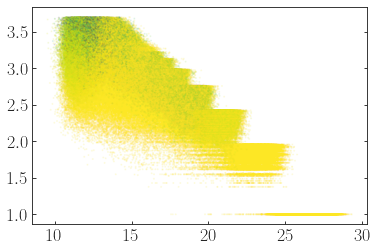

In [28]:
plt.scatter(np.array(baraffe_data['f110']).flatten(),
            np.log10(np.array(baraffe_data['dists']).flatten()), c= np.array(baraffe_data['sl_prob']).flatten(), 
            s=1., alpha=0.1, cmap='viridis')

In [29]:
saumon_data.keys()

dict_keys(['f110', 'f140', 'hs', 'f160', 'appf140s', 'appf110s', 'appf160s', 'dists', 'snrjs', 'spgrid', 'spts', 'sl_prob', 'pointing'])

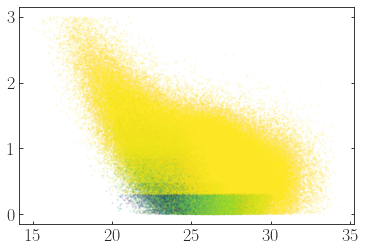

In [30]:
plt.scatter(np.array(saumon_data['appf160s']).flatten(), 
            np.log10(np.array(saumon_data['snrjs']).flatten()),
            c= np.array(saumon_data['sl_prob']).flatten(), 
            s=1., alpha=0.1, cmap='viridis')

#check if doing mean vs fits make a difference 